In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

DAYS_BACK = 60
CYCLETIMES_PATH = '../cycletimes.csv'

CODE_REVIEW = 'Code Review'
TECH_DEBT = 'Tech Debt'
SPIKE = 'Spike'
DESIGN = 'Design'
DAYS_IN_DEV = 'Days in Dev'
TRACKER = 'Tracker'
TASK = 'Task'
BUG = 'Bug'
STORY = 'Story'

YES = 'Yes'
NO = 'No'

ALL_CARDS = 'All Cards*'

# Seaborn options
sns.set(font_scale=2)
sns.set_theme(font_scale=1.5, palette="bright")

# load dataset using pandas
df = pd.read_csv(CYCLETIMES_PATH)
all_df = df
# all_df.info()

# remove design stories
df = df[df[DESIGN] == NO]

# don't look at all data, just last DAYS_BACK days
now = datetime.utcnow()
then = (now - timedelta(days=DAYS_BACK)).isoformat()[:-7]+'Z'
recent_df = df[df[CODE_REVIEW] > then]
# recent_df.info()
df = recent_df


# breakdown by label applied in card title
tech_debt_df = df[df[TECH_DEBT] == YES]
# spikes_df = df[df[SPIKE] == YES]

# breakdown by story type (tracker)
task_df = df[df[TRACKER] == TASK]
bug_df = df[df[TRACKER] == BUG]
story_df = df[df[TRACKER] == STORY]


# df.info()

In [3]:
def report_stats_on_cards(df, title):
    total = len(df)
    average_dd = round(df[DAYS_IN_DEV].mean(), 2)
    num_over_2 = len(df[df[DAYS_IN_DEV] > 2])
    percent_over_2 = str(round(num_over_2/total *100)) + '%'
    print(f'Total: {total}')
    print(f'Average for {title}: {average_dd}')
    print(f'Percentage over 2 Days in Dev: {percent_over_2}')

Total: 50
Average for All Cards*: 3.32
Percentage over 2 Days in Dev: 64%


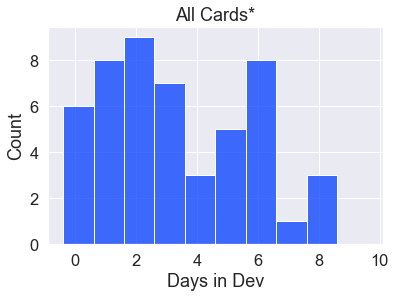

In [4]:
sns.histplot(df, x=DAYS_IN_DEV, discrete=True)
_ = plt.title(ALL_CARDS)
report_stats_on_cards(df, ALL_CARDS)

Total: 4
Average for Tech Debt: 3.55
Percentage over 2 Days in Dev: 75%


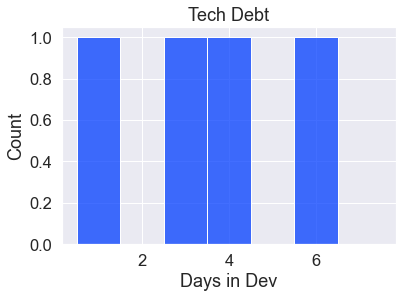

In [5]:
# the good stuff (plots)

sns.histplot(tech_debt_df, x=DAYS_IN_DEV, discrete=True)
_ = plt.title(TECH_DEBT)
report_stats_on_cards(tech_debt_df, TECH_DEBT)

Total: 34
Average for Task: 3.08
Percentage over 2 Days in Dev: 62%


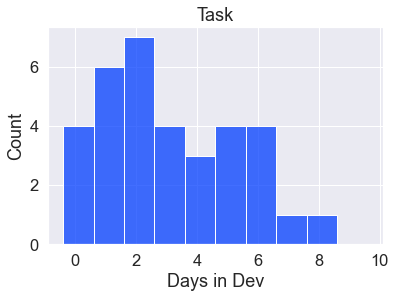

In [6]:
sns.histplot(task_df, x=DAYS_IN_DEV, discrete=True)
_ = plt.title(TASK)
report_stats_on_cards(task_df, TASK)

Total: 7
Average for Bug: 3.21
Percentage over 2 Days in Dev: 71%


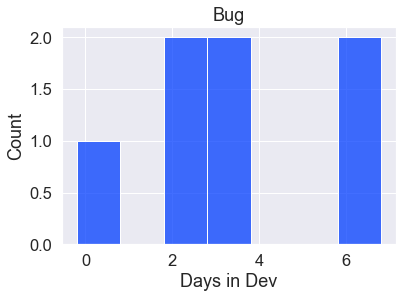

In [7]:
sns.histplot(bug_df, x=DAYS_IN_DEV, discrete=True)
_ = plt.title(BUG)
report_stats_on_cards(bug_df, BUG)

Total: 9
Average for Story: 4.29
Percentage over 2 Days in Dev: 67%


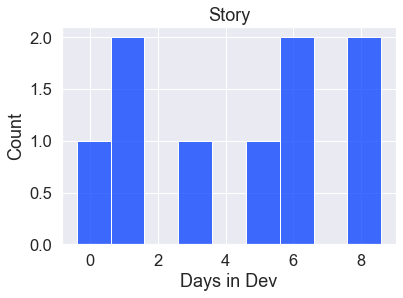

In [8]:
sns.histplot(story_df, x=DAYS_IN_DEV, discrete=True)
_ = plt.title(STORY)
report_stats_on_cards(story_df, STORY)

Task
-----------------------------------
Total: 34
Average for Task: 3.08
Percentage over 2 Days in Dev: 62%

Bug
-----------------------------------
Total: 7
Average for Bug: 3.21
Percentage over 2 Days in Dev: 71%

Story
-----------------------------------
Total: 9
Average for Story: 4.29
Percentage over 2 Days in Dev: 67%

                    Days in Dev by Tracker


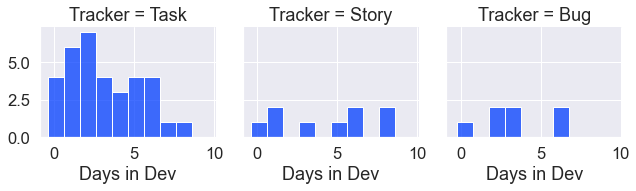

In [9]:
# or all at once, if you like
# plots are side-by-side, but a little harder to read
dfs = [
    {'df': task_df, 'title': TASK},
    {'df': bug_df, 'title': BUG},
    {'df': story_df, 'title': STORY}
]
for d in dfs:
    print(d['title'])
    print('-----------------------------------')
    report_stats_on_cards(d['df'], d['title'])
    print()
g = sns.FacetGrid(df, col=TRACKER)
print('                    Days in Dev by Tracker')
_ = g.map(sns.histplot, DAYS_IN_DEV, discrete=True)